In [2]:
import torch

class TinyModel(torch.nn.Module):
    def __init__(self, x=1024):
        super(TinyModel, self).__init__()
        self.activation = torch.nn.LeakyReLU()
        self.linear1 = torch.nn.Linear(1, x)
        self.linear2 = torch.nn.Linear(x, x)
        self.linear3 = torch.nn.Linear(x, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

if __name__ == '__main__':
    tinymodel = TinyModel()
    print("model params: %i" % sum([param.nelement() for param in tinymodel.parameters()]))
    print('The model:')
    print(tinymodel)
    print("Model params: %i" % sum([param.nelement() for param in tinymodel.parameters()]))

    # Test
    x = torch.rand(10, 1)
    print("x = ", x.size())
    y = tinymodel(x)
    print("y = ", y.size())


model params: 1052673
The model:
TinyModel(
  (activation): LeakyReLU(negative_slope=0.01)
  (linear1): Linear(in_features=1, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1, bias=True)
)
Model params: 1052673
x =  torch.Size([10, 1])
y =  torch.Size([10, 1])


In [6]:
import torch

class TinyModel(torch.nn.Module):
    def __init__(self, x=1024):
        super(TinyModel, self).__init__()
        self.activation = torch.nn.LeakyReLU()
        self.linear1 = torch.nn.Linear(1, x)
        self.linear2 = torch.nn.Linear(x, x)
        self.linear3 = torch.nn.Linear(x, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

def data_gen(batch=30, _range=2 * torch.pi):
    x = torch.rand(batch, 1) * _range
    return x, torch.sin(x)

if __name__ == '__main__':
    tinymodel = TinyModel()
    print("Model params: %i" % sum([param.nelement() for param in tinymodel.parameters()]))

    # Train
    tinymodel.train()
    optimizer = torch.optim.Adam(tinymodel.parameters(), lr=0.001)
    loss_fn = torch.nn.MSELoss(reduction="mean")

    for epoch in range(30):
        err = 0
        for step in range(50):
            inputs, labels = data_gen(100)
            optimizer.zero_grad()
            outputs = tinymodel(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            err += loss.item()
        print("\repoch= %d error= %f: " % (epoch, err), end="")
    print("\n")

    # Test
    tinymodel.eval()
    x, y_true = data_gen(10)
    y_pred = tinymodel(x)

    print(" x=", x)
    print("y_pred=", y_pred)
    print("y_true=", y_true)
    print("L1_Err=", y_true - y_pred)


Model params: 1052673
epoch= 29 error= 0.001074: 

 x= tensor([[0.4435],
        [2.6719],
        [3.3103],
        [1.5806],
        [0.5272],
        [1.5528],
        [5.1173],
        [4.8892],
        [1.4920],
        [6.1170]])
y_pred= tensor([[ 0.4281],
        [ 0.4482],
        [-0.1724],
        [ 0.9987],
        [ 0.5030],
        [ 0.9986],
        [-0.9174],
        [-0.9867],
        [ 0.9955],
        [-0.1775]], grad_fn=<AddmmBackward0>)
y_true= tensor([[ 0.4291],
        [ 0.4526],
        [-0.1679],
        [ 1.0000],
        [ 0.5031],
        [ 0.9998],
        [-0.9191],
        [-0.9844],
        [ 0.9969],
        [-0.1654]])
L1_Err= tensor([[ 1.0117e-03],
        [ 4.3622e-03],
        [ 4.4959e-03],
        [ 1.2292e-03],
        [ 9.1851e-05],
        [ 1.1932e-03],
        [-1.7119e-03],
        [ 2.2465e-03],
        [ 1.3599e-03],
        [ 1.2067e-02]], grad_fn=<SubBackward0>)


Task 2


---



epoch= 4 error= 0.001570: 

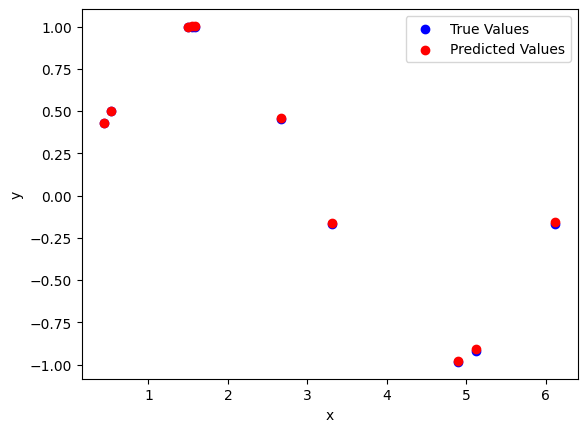

epoch= 9 error= 0.001154: 

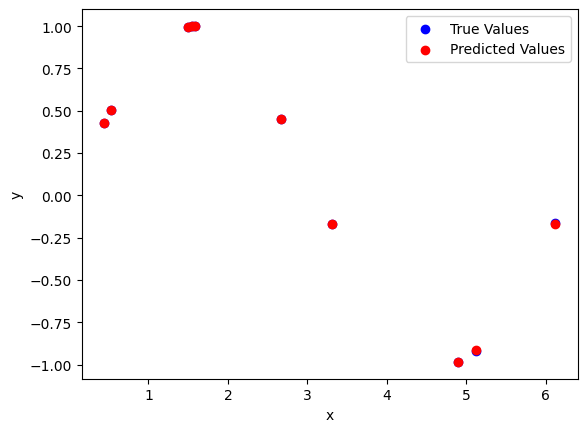

epoch= 14 error= 0.019322: 

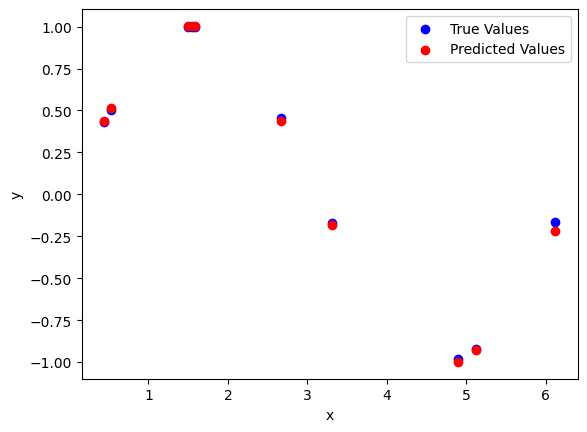

epoch= 19 error= 0.009250: 

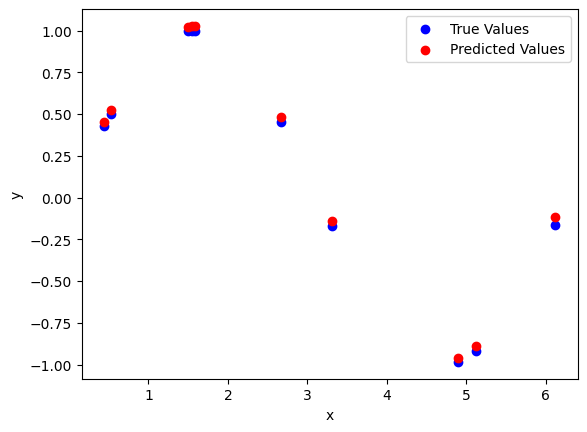

epoch= 24 error= 0.007785: 

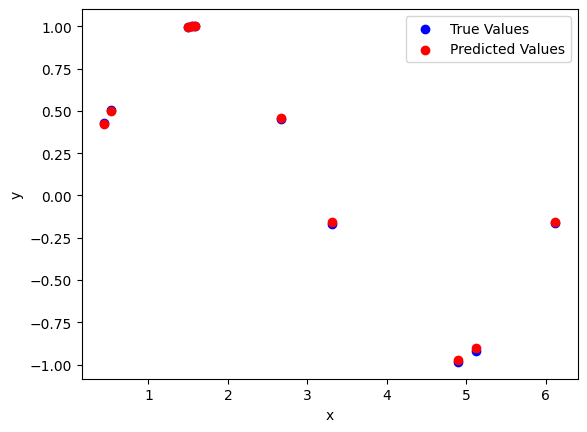

epoch= 29 error= 0.004844: 

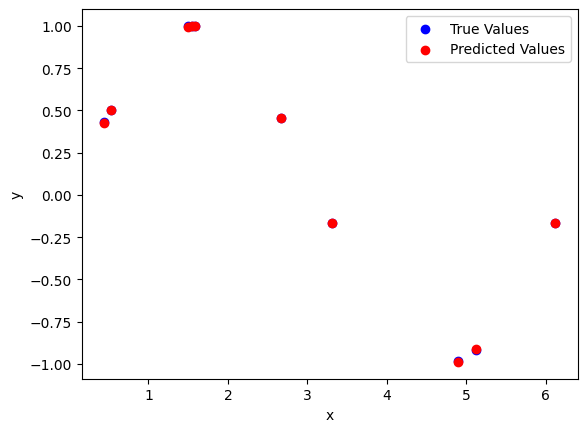

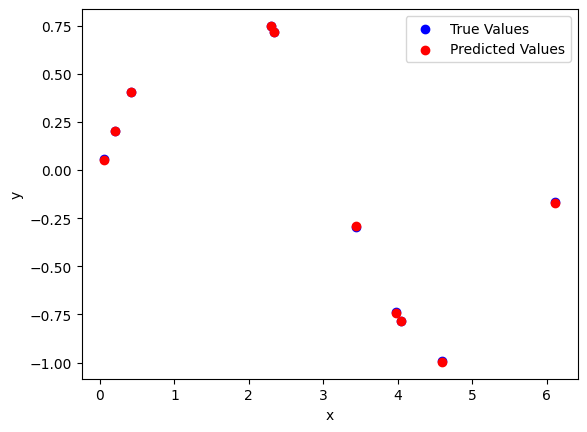

In [7]:
import matplotlib.pyplot as plt
import torch

def visualize_data(x, y_true, y_pred=None):
    plt.scatter(x.numpy(), y_true.numpy(), label='True Values', color='blue')

    if y_pred is not None:
        plt.scatter(x.numpy(), y_pred.detach().numpy(), label='Predicted Values', color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# ...

# Inside the training loop:
for epoch in range(30):
    err = 0
    for step in range(50):
        inputs, labels = data_gen(100)
        optimizer.zero_grad()
        outputs = tinymodel(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        err += loss.item()

    if (epoch + 1) % 5 == 0:
        print("\repoch= %d error= %f: " % (epoch, err), end="")
        tinymodel.eval()
        y_pred = tinymodel(x)
        visualize_data(x, y_true, y_pred)
        tinymodel.train()
print("\n")

# ...

# Test
tinymodel.eval()
x, y_true = data_gen(10)
y_pred = tinymodel(x)
visualize_data(x, y_true, y_pred)


Task 3

epoch= 4 error= 0.011422: 

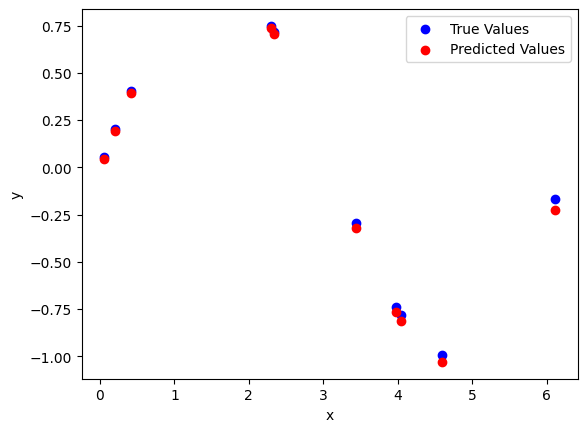

epoch= 9 error= 0.010474: 

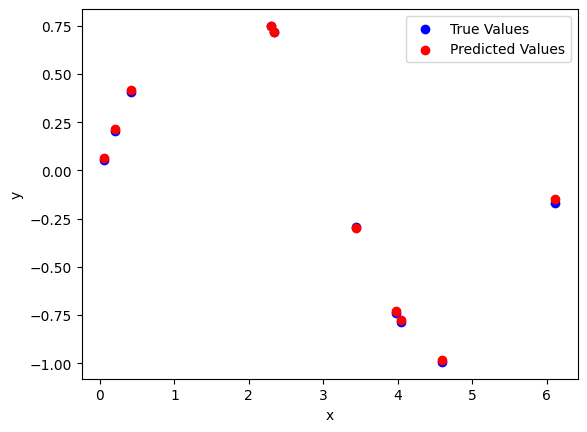

epoch= 14 error= 0.004580: 

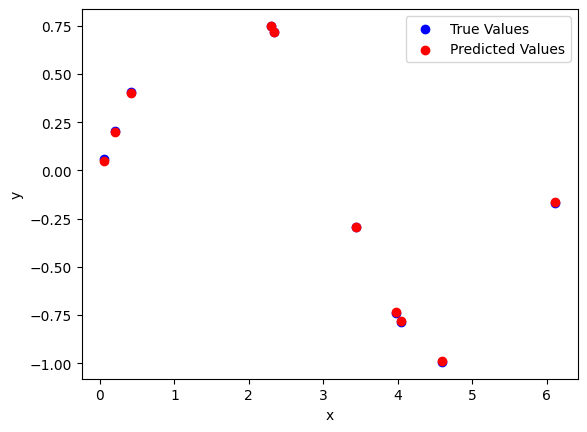

epoch= 19 error= 0.022292: 

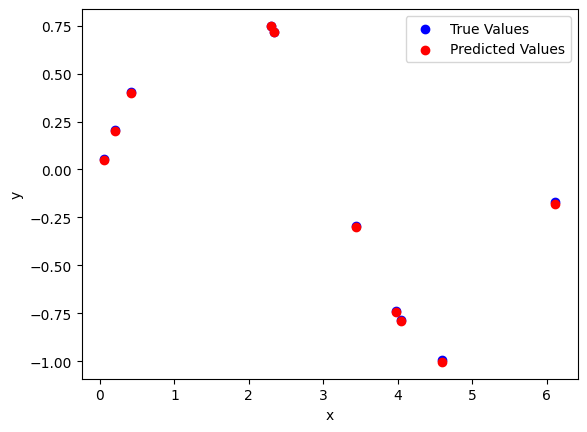

epoch= 24 error= 0.008136: 

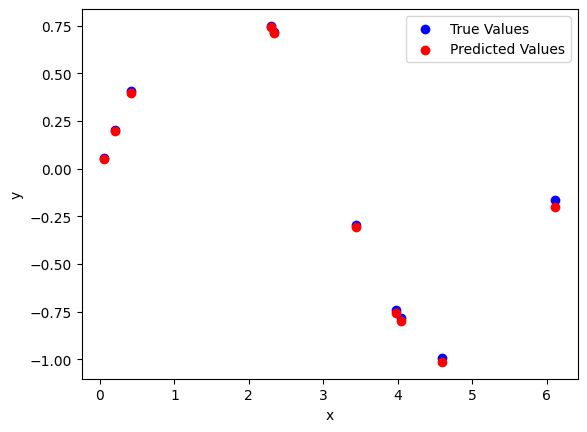

epoch= 29 error= 0.006475: 

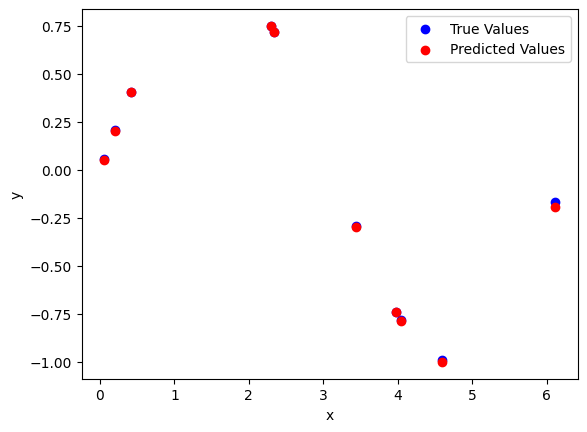

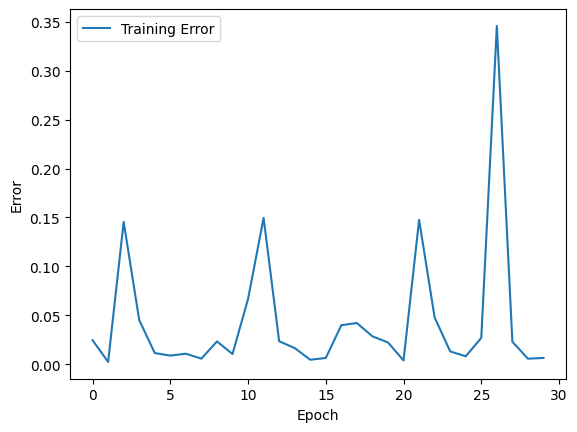

In [8]:
import matplotlib.pyplot as plt
import torch

def plot_errors(errors):
    plt.plot(errors, label='Training Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

# ...

# Inside the training loop:
errors = []
for epoch in range(30):
    err = 0
    for step in range(50):
        inputs, labels = data_gen(100)
        optimizer.zero_grad()
        outputs = tinymodel(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        err += loss.item()

    errors.append(err)
    if (epoch + 1) % 5 == 0:
        print("\repoch= %d error= %f: " % (epoch, err), end="")
        tinymodel.eval()
        y_pred = tinymodel(x)
        visualize_data(x, y_true, y_pred)
        tinymodel.train()
print("\n")
plot_errors(errors)


Task 4

Model params: 33537
epoch= 4 error= 0.611644: 

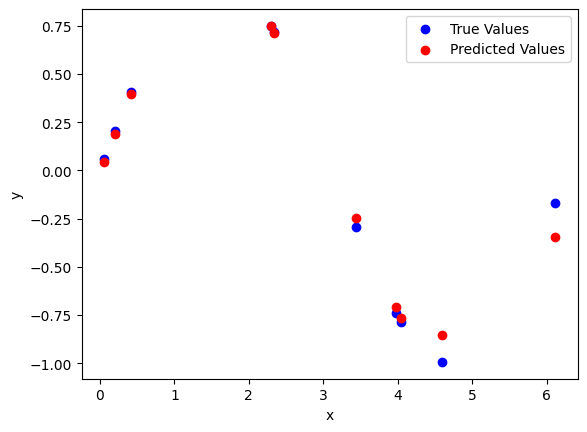

epoch= 9 error= 0.063683: 

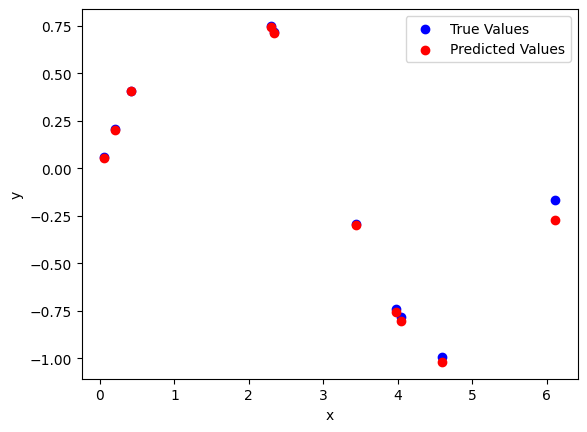

epoch= 14 error= 0.012188: 

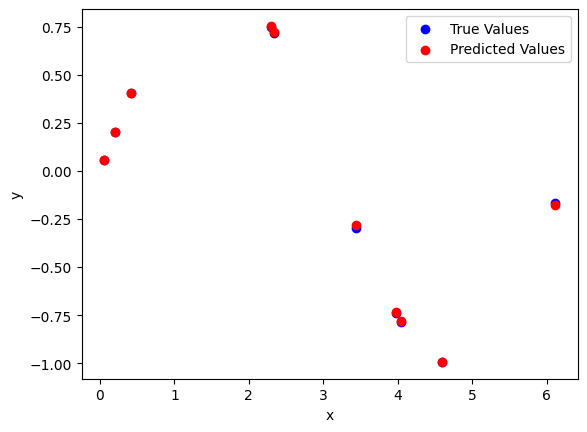

epoch= 19 error= 0.005745: 

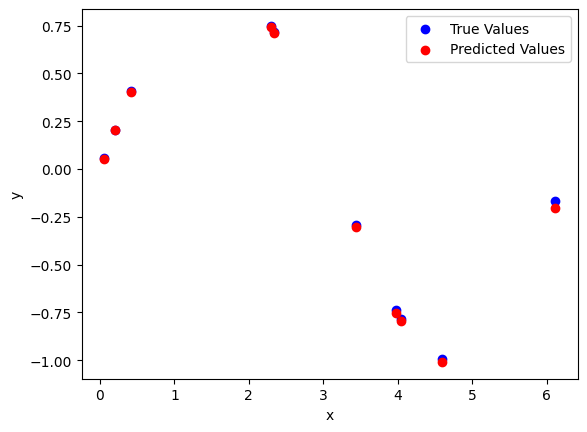

epoch= 24 error= 0.038889: 

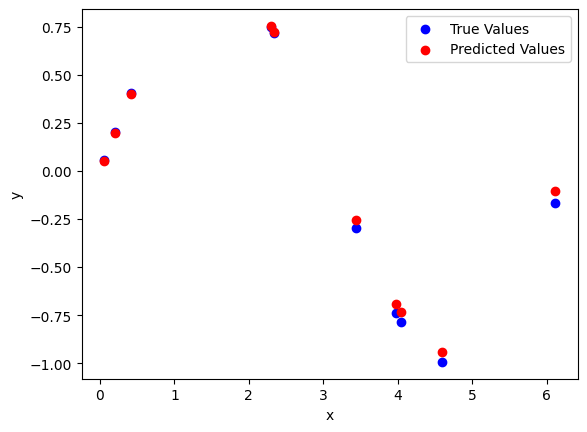

epoch= 29 error= 0.012050: 

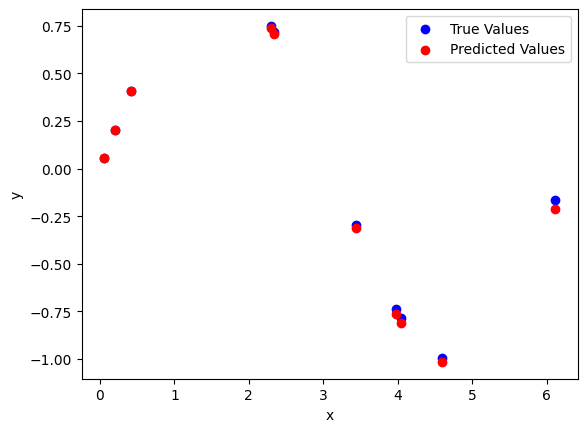

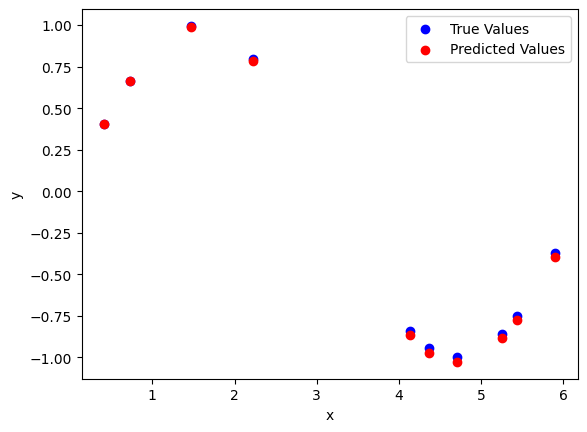

In [10]:
import torch

class ModifiedModel(torch.nn.Module):
    def __init__(self, x=512):
        super(ModifiedModel, self).__init__()
        self.activation = torch.nn.LeakyReLU()
        self.linear1 = torch.nn.Linear(1, x // 2)  # Reduce the number of parameters
        self.linear2 = torch.nn.Linear(x // 2, x // 4)  # Reduce the number of parameters
        self.linear3 = torch.nn.Linear(x // 4, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

# ...

if __name__ == '__main__':
    modified_model = ModifiedModel()
    print("Model params: %i" % sum([param.nelement() for param in modified_model.parameters()]))

    # Train
    modified_model.train()
    optimizer = torch.optim.Adam(modified_model.parameters(), lr=0.001)
    loss_fn = torch.nn.MSELoss(reduction="mean")

    for epoch in range(30):
        err = 0
        for step in range(50):
            inputs, labels = data_gen(100)
            optimizer.zero_grad()
            outputs = modified_model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            err += loss.item()

        if (epoch + 1) % 5 == 0:
            print("\repoch= %d error= %f: " % (epoch, err), end="")
            modified_model.eval()
            y_pred = modified_model(x)
            visualize_data(x, y_true, y_pred)
            modified_model.train()
    print("\n")

    # Test
    modified_model.eval()
    x, y_true = data_gen(10)
    y_pred = modified_model(x)
    visualize_data(x, y_true, y_pred)
